Analysis of customer behavior is essential for any company seeking to understand its ideal customer base. This process not only enhances a business's comprehension of its clientele but also streamlines the customization of products to align with the distinct needs, behaviors, and concerns of various customer segments.

Within our current dataset comprising information from 2240 customers, we've collected data on crucial aspects such as educational level, marital status, year of birth, expenditure on our products, and purchase modes over the past two years. The focus of our investigation lies in unraveling the factors influencing customer spending patterns. This exploration involves addressing pivotal questions, including identifying the most favored purchasing modes among customers and delving into the impact of educational level, age range, and marital status on expenditures. Furthermore, our analysis extends to understanding the types of products that customers are most inclined to purchase.

In [ ]:
 # Import libraries
 import pandas as pd
 import numpy as np
 import seaborn as sea
 import scipy.stats as stats
 import matplotlib
 import matplotlib.pyplot as plt
 from matplotlib import patches
 !pip install skimpy
 !pip install pingouin
 import pingouin as pg

 from datetime import date
 plt.figure(figsize=(7, 5))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.3/114.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 13.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 9.0.0
    Uninstalling pyarrow-9.0.0:
      Successfully uninstalled pyarrow-9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=f0e4c75c839747720ddff228b4c63d99d9f9c6bd88a5e3b6ad5caaeb56d4be7c
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


<Figure size 700x500 with 0 Axes>

<Figure size 700x500 with 0 Axes>

In [ ]:
# Upload dataset
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign.csv to marketing_campaign.csv


In [ ]:
# Loading dataset
import io
df = pd.read_csv(io.BytesIO(uploaded['marketing_campaign.csv']),sep="\t")

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.shape

(2240, 29)

# **Data Cleaning and Transformation**
In this phase, we address missing values in the data and perform data transformation to ensure it is in the appropriate format.

To begin, we categorize values in the 'Education' and 'Marital_Status' columns. Additionally, we calculate and categorize ages based on the year of birth.

In [ ]:
# Remove missing value (null)
df.dropna(inplace=True)

In [ ]:
print(df['Education'].unique())
print(df['Marital_Status'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [ ]:
customer_data = df.copy()

# Replacing 2nd Cycle with Master degree in Education column
replace_vals = '2n Cycle'
customer_data['Education'] = customer_data['Education'].apply(lambda val:'Master' if val in replace_vals else val )

In [ ]:
# Grouping the categories in Marital_Status column into 2 categories such as 'single' and 'in relationship'
replace_vals = ['Together', 'Married']
customer_data['Marital_Status'] = customer_data['Marital_Status'].apply(lambda val: 'In relationship' if val in replace_vals else 'Single')

In [ ]:
print(customer_data['Education'].unique())
print(customer_data['Marital_Status'].unique())

['Graduation' 'PhD' 'Master' 'Basic']
['Single' 'In relationship']


In [ ]:
# Calculating current year
current_year = date.today().year

# Adding column "Age"
customer_data['Age'] = current_year - customer_data['Year_Birth']

In [ ]:
# Grouping Age
customer_data['Age_Group'] = customer_data['Age'].apply(lambda x: 'Children' if x <= 16 else (
    'Youth' if 17 <= x <= 30 else (
    'Middle Aged' if 30 < x <=  45 else 'Old'
    )
))

In [ ]:
# Drop some tables
customer_data = customer_data.drop(['ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Complain'], axis=1)

In [ ]:
# Calculating Total Spent by customers
customer_data['Total_Spent'] = customer_data['MntWines'] + customer_data['MntFruits'] + customer_data['MntMeatProducts'] + customer_data['MntFishProducts'] + customer_data['MntSweetProducts'] +customer_data['MntGoldProds']



In [ ]:
# Calculating total number of purchase made by customers
customer_data['Total_Purchases'] = customer_data['NumDealsPurchases' ] + customer_data['NumWebPurchases'] + customer_data['NumCatalogPurchases'] + customer_data['NumStorePurchases']

In [ ]:
# Calculating the enrollment year of customer
customer_data['Dt_Customer'] = pd.to_datetime(customer_data['Dt_Customer'], errors='coerce')
customer_data['Enrollment_Year'] = customer_data['Dt_Customer'].dt.year
customer_data['Seniority'] = current_year - customer_data['Enrollment_Year']

<ipython-input-16-7c1dfde1bb90>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customer_data['Dt_Customer'] = pd.to_datetime(customer_data['Dt_Customer'], errors='coerce')


In [ ]:
# Calculating total number of accepted offers for each customer
customer_data['Total_Offers'] = customer_data['AcceptedCmp1'] + customer_data['AcceptedCmp2'] + customer_data['AcceptedCmp3'] + customer_data['AcceptedCmp4'] + customer_data['AcceptedCmp5']

In [ ]:
customer_data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Age,Age_Group,Total_Spent,Total_Purchases,Enrollment_Year,Seniority,Total_Offers
0,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,...,0,0,1,66,Old,1617,25,2012,11,0
1,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,...,0,0,0,69,Old,27,6,2014,9,0
2,Graduation,In relationship,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0,0,58,Old,776,21,2013,10,0
3,Graduation,In relationship,26646.0,1,0,2014-10-02,26,11,4,20,...,0,0,0,39,Middle Aged,53,8,2014,9,0
4,PhD,In relationship,58293.0,1,0,2014-01-19,94,173,43,118,...,0,0,0,42,Middle Aged,422,19,2014,9,0


# **Exploratory Data Analysis**

**Age Range of Customer**

In [ ]:
# Calculating percentage of age range
age_range = customer_data.groupby('Age_Group').size().reset_index(name='num')
age_range['percentage'] = (age_range['num'] * 100 / age_range['num'].sum()).round(2)

In [ ]:
print(age_range)

     Age_Group   num  percentage
0  Middle Aged   533       24.05
1          Old  1668       75.27
2        Youth    15        0.68


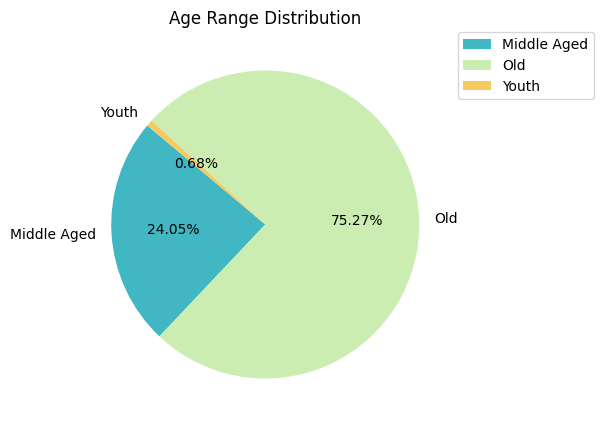

In [ ]:
#Plotting age range distribution
labels = age_range['Age_Group']
sizes = age_range['num']
colors = ["#41B7C4", "#CCEDB1", "#F5CA63"]

# Create a pie chart
plt.figure(figsize=(7, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.title('Age Range Distribution')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.show()

*Observation:*

*   75.27% of customers are aged above 45
*   24.05% of them are Middle Aged (between 30 and 45)
*   There is no significant amount of Children and Youth customer


**Education Level of Customer**

In [ ]:
# Calculating percentage of education level
education_range = customer_data.groupby('Education').size().reset_index(name='num')
education_range['percentage'] = (education_range['num'] * 100 / age_range['num'].sum()).round(2)

In [ ]:
print(education_range)

    Education   num  percentage
0       Basic    54        2.44
1  Graduation  1116       50.36
2      Master   565       25.50
3         PhD   481       21.71


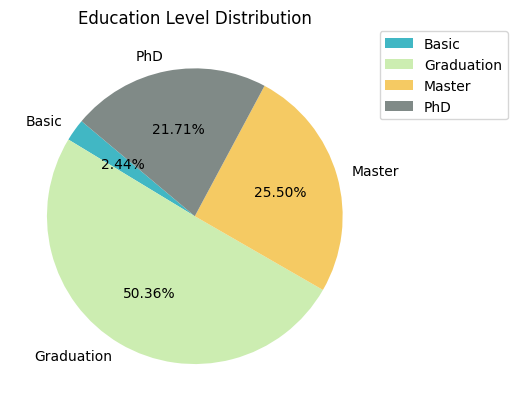

In [ ]:
# Plotting Education Level Distribution
labels = education_range['Education']
sizes = education_range['num']
colors = ["#41B7C4", "#CCEDB1", "#F5CA63", "#808A87"]

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.title('Education Level Distribution')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.show()

*Observation:*

*  50.36% of customers are Graduation
*  25.50% of customers are Master
*  21.71% of customers are PhD
*  Slightly amount of customers are Basic


**Marital Level of Customer**

In [ ]:
# Calculating percentage of marital status
marital_range = customer_data.groupby('Marital_Status').size().reset_index(name='num')
marital_range['percentage'] = (education_range['num'] * 100 / age_range['num'].sum()).round(2)

In [ ]:
print(marital_range)

    Marital_Status   num  percentage
0  In relationship  1430        2.44
1           Single   786       50.36


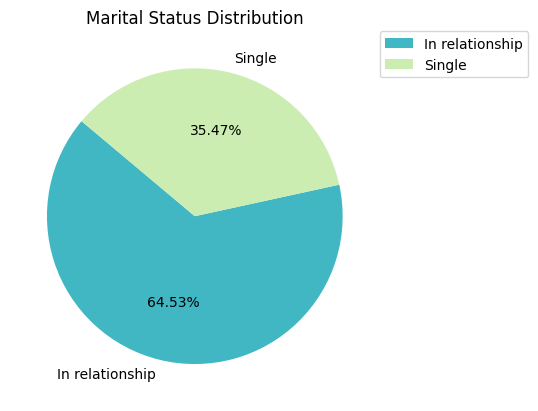

In [ ]:
# Plotting Marital Status Distribution
labels = marital_range['Marital_Status']
sizes = marital_range['num']
colors = ["#41B7C4", "#CCEDB1"]

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.title('Marital Status Distribution')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.show()

*Observation:*

*   64.53% of customers are in relationship
*   35.47% of them are single


**Total Spent Variable**

In [ ]:
from matplotlib.ticker import PercentFormatter

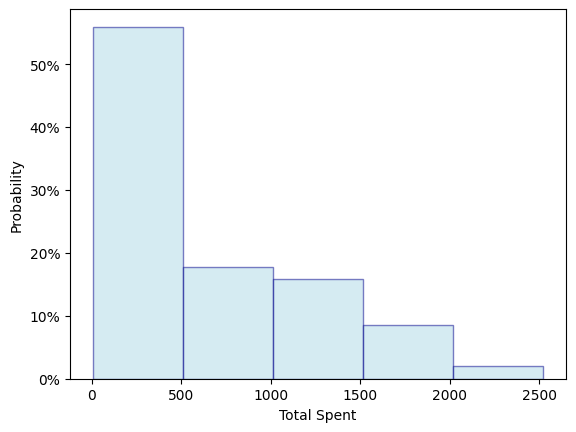

In [ ]:
plt.hist(customer_data['Total_Spent'], weights=np.ones(len(customer_data['Total_Spent'])) / len(customer_data['Total_Spent'])*100, bins=5, alpha=0.5, color='lightblue', edgecolor='darkblue')
# Customize the x-axis ticks
plt.xticks(np.arange(0, 2501, 500))

# Customize the y-axis
plt.gca().yaxis.set_major_formatter(PercentFormatter())
# Labeling
plt.xlabel('Total Spent')
plt.ylabel('Probability')

plt.show()

*Observation :*

*   58% of customers have spending below 500 dollars
*   18% of customer have spending between 500 dollars and 1000 dollars
*   16% of customer have spending between 1000 dollars and 1500 dollars
*   Spending more than 2000 dollars seems to be rare

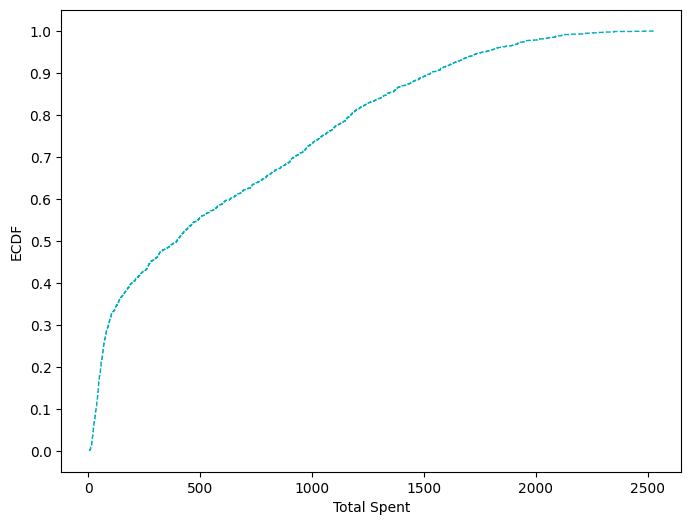

In [ ]:
# Sort the data for ECDF plotting
sorted_data = np.sort(customer_data['Total_Spent'])

# Calculate the ECDF
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Create the ECDF plot
plt.figure(figsize=(8, 6))
plt.step(sorted_data, y, color="#00AFBB", linestyle='--', linewidth=1)

# Customize the y-axis ticks
plt.yticks(np.arange(0, 1.1, 0.1))

# Labeling
plt.xlabel('Total Spent')
plt.ylabel('ECDF')

# Apply a white background theme
plt.style.use('ggplot')

# Show the plot
plt.show()

*Observation :*

*   To support the previous graph, more than 95% of customer spent less than 2000 dollars
*   55% of customer spending less than 500 dollars



**TOTAL INCOME VARIABLE**


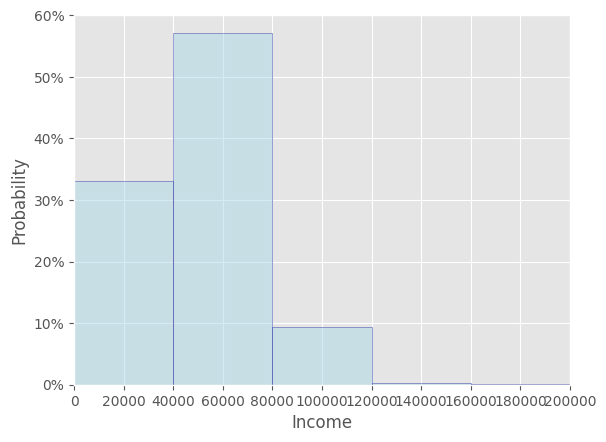

In [ ]:
plt.hist(customer_data['Income'], weights=np.ones(len(customer_data['Income'])) / len(customer_data['Income'])*100,  range=(0,200000), bins=5, alpha=0.5, color='lightblue', edgecolor='darkblue')

# Customize the x-axis limits and ticks
plt.xlim(0, 200000)
plt.xticks(np.arange(0, 200001, 20000))

# Customize the y-axis
plt.gca().yaxis.set_major_formatter(PercentFormatter())

# Labeling
plt.xlabel('Income')
plt.ylabel('Probability')

plt.show()

*Observation :*

*   58% of customer earn between 40k and 80k dollars annually
*   32% of customer spending less than 500 dollars
*   32% of customer spending less than 500 dollars


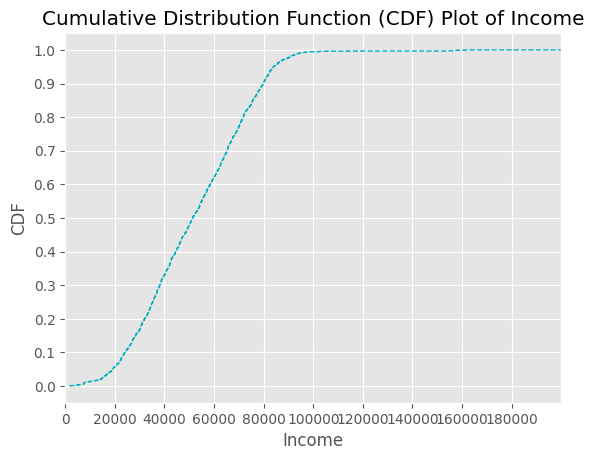

In [ ]:
# Sort the data for CDF plotting
sorted_data = np.sort(customer_data['Income'])

# Calculate the CDF
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Create the CDF plot
plt.step(sorted_data, y, color="#00AFBB", linestyle='--', linewidth=1)

# Customize the x-axis and y-axis ticks
plt.xticks(np.arange(0,200000, step=20000))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlim(0, 200000)

# Labeling
plt.xlabel('Income')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF) Plot of Income')

# Apply a white background theme
plt.style.use('ggplot')

# Show the plot
plt.show()

*Observation:*

More than 95% customer earn less the 100k dollars.

**Correlation between Income and Expense Varibale (Total Spent)**

In [ ]:
import scipy.stats as stats

# Perform the correlation test
correlation_coefficient, p_value = stats.pearsonr(customer_data['Income'], customer_data['Total_Spent'])

# Print the results
print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

Correlation Coefficient: 0.6675760903888284
P-value: 5.843958806402649e-286


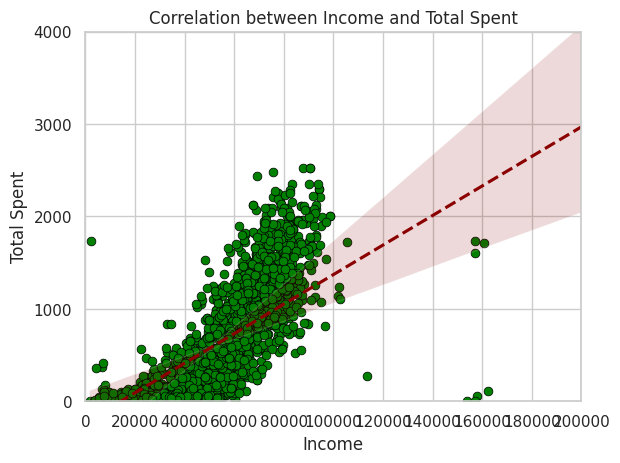

In [ ]:
sea.set(style="whitegrid")

# Create the scatterplot
sea.scatterplot(data=customer_data, x="Income", y="Total_Spent", color="green", edgecolor="black", linewidth=0.5, s=40)

# Set x-axis and y-axis limits and ticks
plt.xlim(0, 200000)
plt.xticks(range(0, 200001, 20000))
plt.ylim(0, 4000)
plt.yticks(range(0, 4001, 1000))

# Add a linear regression line
sea.regplot(data=customer_data, x="Income", y="Total_Spent", scatter=False, color="darkred", line_kws={"linestyle": "--"})

# Labeling
plt.xlabel('Income')
plt.ylabel('Total Spent')
plt.title('Correlation between Income and Total Spent')

# Display the plot
plt.show()


*Observation :*

The correlation coefficient between income and total spent variable is 0.66. This shows that, income and the expense variable have a moderate correlation postively.

**Average amount spend by customers with respect to Education**

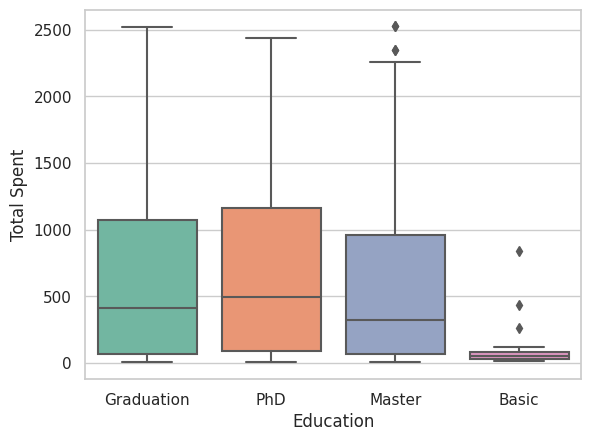

In [ ]:
sea.set(style="whitegrid")

# Create the box plot
sea.boxplot(data=customer_data, x="Education", y="Total_Spent", palette="Set2")

# Labeling
plt.xlabel('Education')
plt.ylabel('Total Spent')

# Display the plot
plt.show()

*Observation :*

The average amount spend  by the customer with basic education customer is lower than other. Customer with PhD customer is the highest average amount spend.

**Average amount spend by customers with respect to Marital Status**

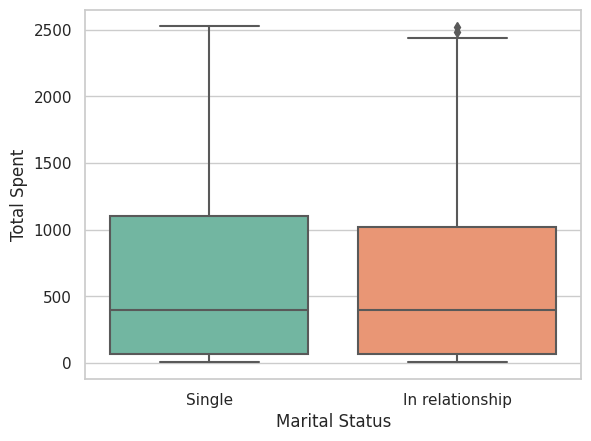

In [ ]:
sea.set(style="whitegrid")

# Create the box plot
sea.boxplot(data=customer_data, x="Marital_Status", y="Total_Spent", palette="Set2")

# Labeling
plt.xlabel('Marital Status')
plt.ylabel('Total Spent')

# Display the plot
plt.show()

*Observation :*

The average amount spend  by the customer who are single is slighly bigger than customer who in relationship.

**Average amount spend by customers with respect to Age Range**

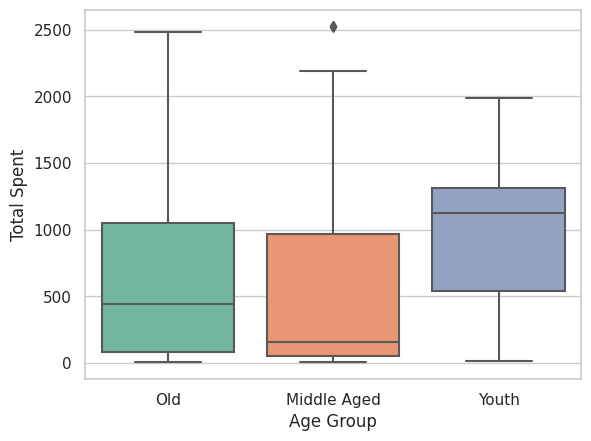

In [ ]:
sea.set(style="whitegrid")

# Create the box plot
sea.boxplot(data=customer_data, x="Age_Group", y="Total_Spent", palette="Set2")

# Labeling
plt.xlabel('Age Group')
plt.ylabel('Total Spent')

# Display the plot
plt.show()

*Observation :*

Customer who aged between 17 and 30 spend more than the other age range.

**Average amount spend by customers with respect to Products**

In [ ]:
# Select columns that start with "Mnt"
products_df = customer_data.filter(like="Mnt")

# Create a DataFrame with the Product_Name column
Product_Name = pd.DataFrame({'Product_Name': ['Wine', 'Fruit', 'Meat', 'Fish', 'Sweet', 'Gold'] * 2240})

# Create a DataFrame with Total_Spent
Total_Spent = pd.DataFrame({'Total_Spent': products_df.values.ravel()})

# Combine Product_Name and Total_Spent
products_df = pd.concat([Product_Name, Total_Spent], axis=1)

# Display the first 3 rows
print(products_df.head(3))


  Product_Name  Total_Spent
0         Wine        635.0
1        Fruit         88.0
2         Meat        546.0


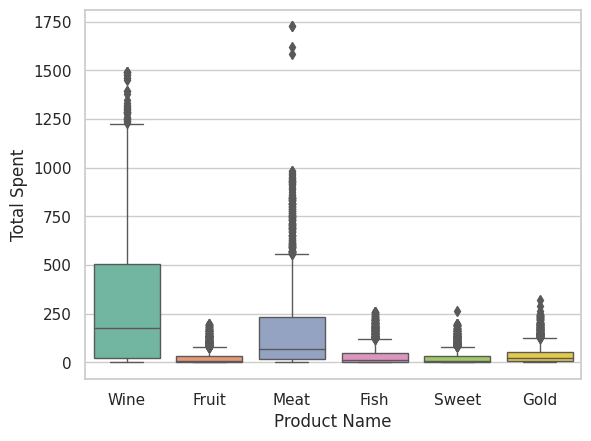

In [ ]:
sea.set(style="whitegrid")

# Create the box plot
sea.boxplot(data=products_df, x="Product_Name", y="Total_Spent", palette="Set2", fliersize=5, linewidth=1)

# Rotate x-axis labels for better visibility
#plt.xticks(rotation=45)

# Labeling
plt.xlabel('Product Name')
plt.ylabel('Total Spent')

# Display the plot
plt.show()


**Observations:**

Amount spend on prducts such as Wine & Meat seem to be high than the other products.

**CDF & PDF of Customer Purchases in last 2 years**

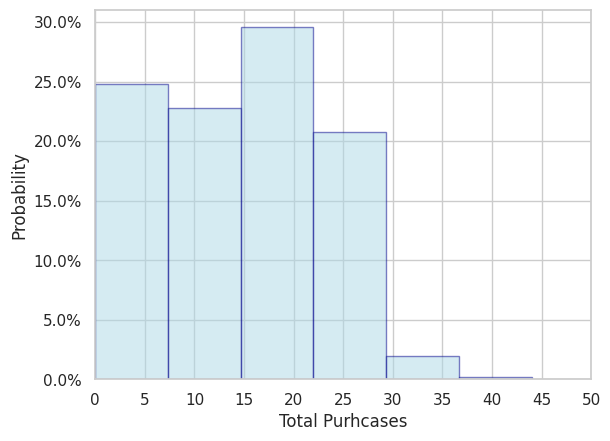

In [ ]:
# Plotting histogram
plt.hist(customer_data['Total_Purchases'], weights=np.ones(len(customer_data['Total_Purchases'])) / len(customer_data['Total_Purchases'])*100, bins=6, alpha=0.5, color='lightblue', edgecolor='darkblue')

# Customize the y-axis
plt.gca().yaxis.set_major_formatter(PercentFormatter())

# Determine the lower value of Total_Purchases
lower_limit = customer_data['Total_Purchases'].min()

# Set x-axis limits and ticks
plt.xlim(lower_limit, 50)
plt.xticks(range(lower_limit, 51, 5))

# Labeling
plt.xlabel('Total Purhcases')
plt.ylabel('Probability')

plt.show()

Observation:


*   29% of Customer purchase between 15 to 22 times
*   25% of Customer purchase below 7 times
*   22.5% of Customer purchase between 7 to 15 times
*   21% of Customer purchase between 22 to 29 times

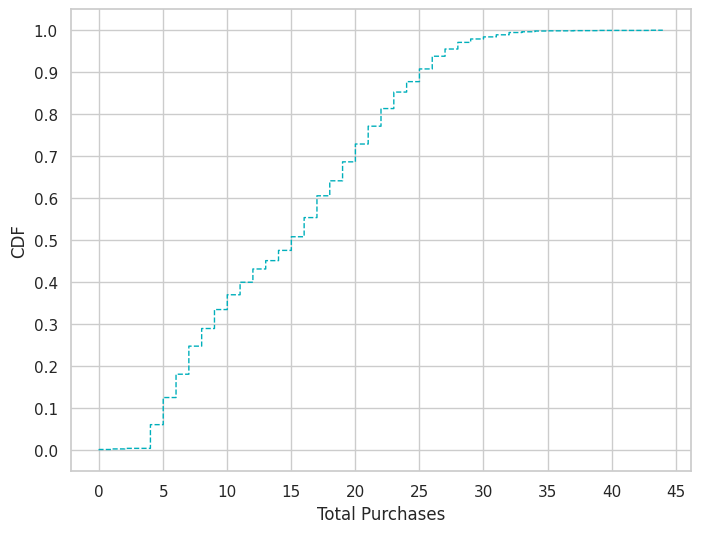

In [ ]:
# Sort the data for CDF plotting
sorted_data = np.sort(customer_data['Total_Purchases'])

# Calculate the CDF
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Create the CDF plot
plt.figure(figsize=(8, 6))
plt.step(sorted_data, y, color="#00AFBB", linestyle='--', linewidth=1)

# Customize the x-axis and y-axis ticks
plt.xticks(np.arange(0,50, step=5))
plt.yticks(np.arange(0, 1.1, 0.1))

# Labeling
plt.xlabel('Total Purchases')
plt.ylabel('CDF')

# Apply a white background theme
plt.style.use('ggplot')

# Show the plot
plt.show()

Observation:

*   88% of Customers purchase less than 25 times
*   48% of Customers purchase less than 15 times


**Preferred Purchase Mode by Customers**

In [ ]:
# Assuming you have a DataFrame named main_df
# Select columns that start with "Num" and end with "Purchases"
purchase_df = customer_data.filter(like='Num').filter(like='Purchases')

# Create a DataFrame for Purchase_Name
Purchase_Name = pd.DataFrame({'Purchase_Name': ['Deal', 'Web', 'Catalog', 'Store'] * 2240})

# Create a DataFrame for Total_Purchases by unlisting purchase_df
Total_Purchases = pd.DataFrame({'Total_Purchases': purchase_df.values.flatten()}, index=None)

# Combine Purchase_Name and Total_Purchases into a single DataFrame
purchase_df = pd.concat([Purchase_Name, Total_Purchases], axis=1)

# Display the first 3 rows of the resulting DataFrame
print(purchase_df.head(3))


  Purchase_Name  Total_Purchases
0          Deal              3.0
1           Web              8.0
2       Catalog             10.0


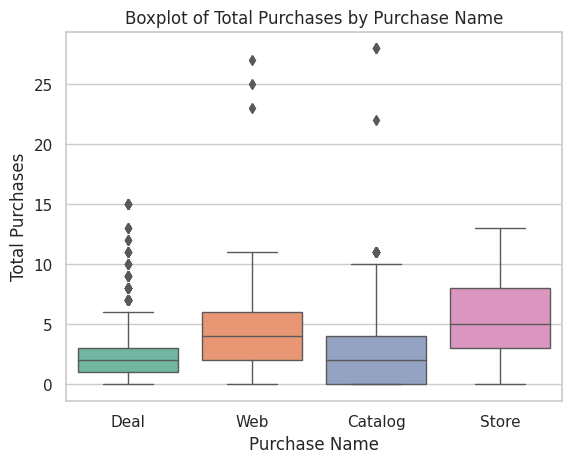

In [ ]:
sea.set(style="whitegrid")

# Create the box plot
sea.boxplot(data=purchase_df, x="Purchase_Name", y="Total_Purchases", palette="Set2", fliersize=5, linewidth=1)

# Rotate x-axis labels for better visibility
#plt.xticks(rotation=45)

# Display the plot
plt.xlabel("Purchase Name")
plt.ylabel("Total Purchases")
plt.title("Boxplot of Total Purchases by Purchase Name")
plt.show()

In [ ]:
# Assuming you have a DataFrame named purchase_df
# Group by 'Purchase_Name' and calculate the sum of 'Total_Purchases' for each group
grouped_df = purchase_df.groupby('Purchase_Name')['Total_Purchases'].sum().reset_index()

# Calculate the percentage and round it to 2 decimal places
grouped_df['percentage'] = (grouped_df['Total_Purchases'] * 100 / grouped_df['Total_Purchases'].sum()).round(2)

# Display the resulting DataFrame
print(grouped_df)


  Purchase_Name  Total_Purchases  percentage
0       Catalog           5919.0       17.95
1          Deal           5149.0       15.61
2         Store          12855.0       38.98
3           Web           9053.0       27.45


Observation:
*   Purchase made in Stores is the most preferred purchase method for customers with percentage in 38.98%.
*   Another preferred purchase method is made in Web with percentage 27.45%


**Average Web Visit for last month**

In [ ]:
# Assuming you have a DataFrame named main_df
# Calculate the average of the 'NumWebVisitsMonth' column
average_web_visit = customer_data['NumWebVisitsMonth'].mean()

# Display the result
print("Average_Web_Visit:", average_web_visit)

Average_Web_Visit: 5.319043321299639


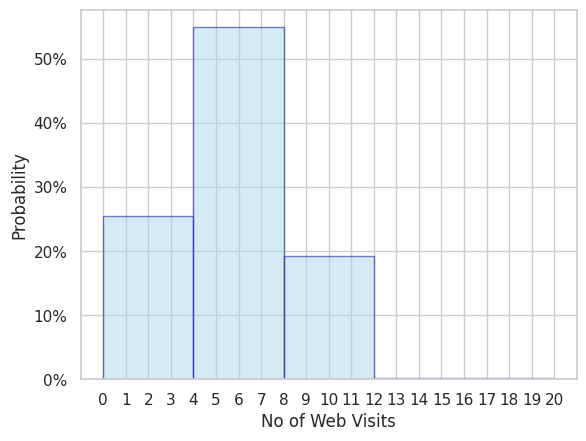

In [ ]:
# Plotting histogram
plt.hist(customer_data['NumWebVisitsMonth'], weights=np.ones(len(customer_data['Total_Purchases'])) / len(customer_data['Total_Purchases'])*100, bins=5, alpha=0.5, color='lightblue', edgecolor='darkblue')

# Customize the y-axis
plt.gca().yaxis.set_major_formatter(PercentFormatter())

# Determine the lower value of Total_Purchases
lower_limit = customer_data['NumWebVisitsMonth'].min()

# Set x-axis limits and ticks
#plt.xlim(lower_limit, 20)
plt.xticks(range(lower_limit, 21, 1))


# Labeling
plt.xlabel('No of Web Visits')
plt.ylabel('Probability')

plt.show()

*Observations:*

*   58% of customers visit the company's website 4 to 8 times
*   25% of customers visit the company's website below 4 times
*   Around 20% of customers visit the company's website 8 to 12 times
*   The chances of visiting the website more than 12 times seem to be rare

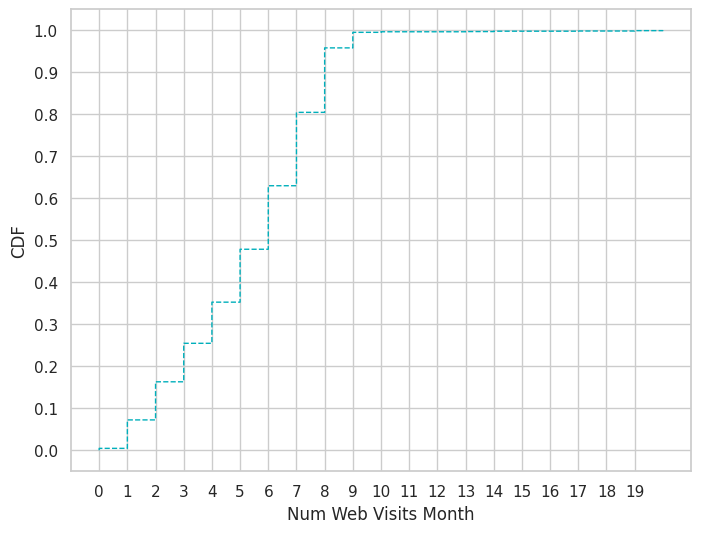

In [ ]:
# Sort the data for CDF plotting
sorted_purchases = np.sort(customer_data['NumWebVisitsMonth'])

# Calculate the CDF
y = np.arange(1, len(sorted_purchases) + 1) / len(sorted_purchases)

# Create the CDF plot
plt.figure(figsize=(8, 6))
plt.step(sorted_purchases, y, color="#00AFBB", linestyle='--', linewidth=1)

# Customize the x-axis and y-axis ticks
plt.xticks(np.arange(0,20, step=1))
plt.yticks(np.arange(0, 1.1, 0.1))

# Labeling
plt.xlabel('Num Web Visits Month')
plt.ylabel('CDF')

# Apply a white background theme
plt.style.use('ggplot')

# Show the plot
plt.show()

Observations:

95% of customers visits the website less than 9 times.

**Percentage of Customer's Enrollment in Years**

In [ ]:
seniority = customer_data[['Seniority']].rename(columns={'Seniority': 'Total_Years'})

# Group by 'Total_Years' and calculate the count of each group
seniority = seniority.groupby('Total_Years').size().reset_index(name='num')

# Calculate the percentage and round it to 2 decimal places
seniority['percentage'] = (seniority['num'] * 100 / seniority['num'].sum()).round(2)

# Convert 'Total_Years' to a categorical variable (factor)
seniority['Total_Years'] = seniority['Total_Years'].astype('category')

# Display the resulting DataFrame
print(seniority)


  Total_Years   num  percentage
0           9   553       24.95
1          10  1173       52.93
2          11   490       22.11


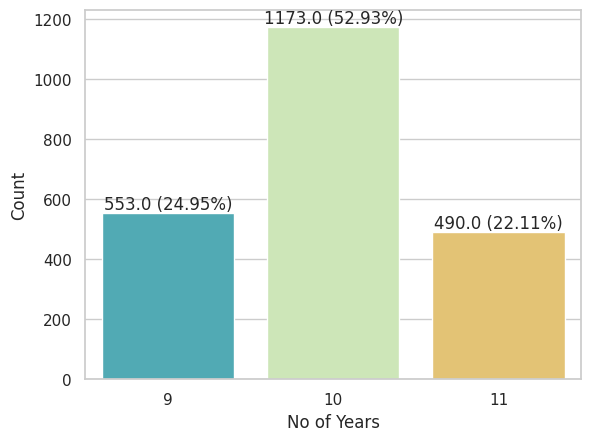

In [ ]:
sea.set(style="whitegrid")  # Set the plot style

# Create a bar plot using seaborn
sea.barplot(x='Total_Years', y='num', data=seniority, palette=["#41B7C4", "#CCEDB1", "#F5CA63"])

# Add text labels with percentages
for index, row in seniority.iterrows():
    plt.text(index, row['num'], f"{row['num']} ({row['percentage']}%)", va='bottom', ha='center')

# Customize labels and scales
plt.xlabel('No of Years')
plt.ylabel('Count')

# Show the plot
plt.show()


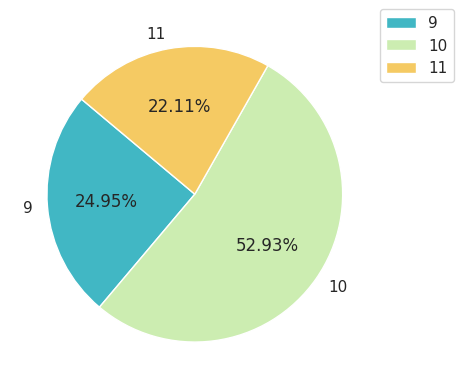

In [ ]:
# Plotting Education Level Distribution
# Data
labels = seniority['Total_Years']
sizes = seniority['num']
colors = ["#41B7C4", "#CCEDB1", "#F5CA63", "#808A87"]

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
#plt.title('Education Level Distribution')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.show()

In [ ]:
# Group by 'Enrollment_Year' and calculate the sum of 'Total_Spent' for each group
grouped_df = customer_data.groupby('Enrollment_Year')['Total_Spent'].sum().reset_index()

# Calculate the percentage and round it to 2 decimal places
grouped_df['percentage'] = (grouped_df['Total_Spent'] * 100 / grouped_df['Total_Spent'].sum()).round(2)

# Display the resulting DataFrame
print(grouped_df)


   Enrollment_Year  Total_Spent  percentage
0             2012       365833       27.19
1             2013       706357       52.51
2             2014       273089       20.30


*Observations:*

*   52.9% of Customers have been with the company for 10 years
*   52% of total amount spend by customers who have enrolled in 2013

**Correlation between Income and Number of Purchases**



In [ ]:
# Perform the correlation test
correlation_coefficient, p_value = stats.pearsonr(customer_data['Income'], customer_data['Total_Purchases'])

# Print the results
print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

Correlation Coefficient: 0.5668725910947578
P-value: 1.2919192539173717e-188


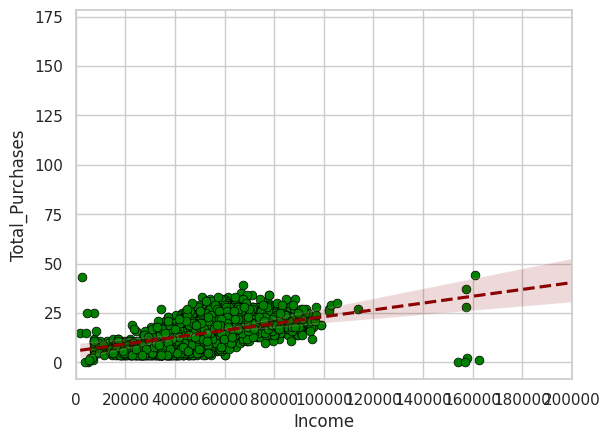

In [ ]:
sea.set(style="whitegrid")

# Create the scatterplot
sea.scatterplot(data=customer_data, x="Income", y="Total_Purchases", color="green", edgecolor="black", linewidth=0.5, s=40)

# Set x-axis limits and ticks
plt.xlim(0, 200000)
plt.xticks(range(0, 200001, 20000))

# Set y-axis limits and ticks
#plt.ylim(0, 4000)
#plt.yticks(range(0, 4001, 1000))

# Add a linear regression line
sea.regplot(data=customer_data, x="Income", y="Total_Purchases", scatter=False, color="darkred", line_kws={"linestyle": "--"})

# Display the plot
plt.show()

*Observations:*

The correlation coeffieienct between income and total spent variable is 0.56. This shows that, income and total purchases have a moderate correlation postively.

**Performance of Campaigns**

In [ ]:
offers = customer_data[['Total_Offers']].rename(columns={'Total_Offers': 'Offers_Total'})

# Group by 'Total_Years' and calculate the count of each group
offers = offers.groupby('Offers_Total').size().reset_index(name='num')

# Calculate the percentage and round it to 2 decimal places
offers['percentage'] = (offers['num'] * 100 / seniority['num'].sum()).round(2)

# Convert 'Total_Years' to a categorical variable (factor)
offers['Offers_Total'] = offers['Offers_Total'].astype('category')

# Display the resulting DataFrame
print(offers)


  Offers_Total   num  percentage
0            0  1757       79.29
1            1   323       14.58
2            2    81        3.66
3            3    44        1.99
4            4    11        0.50


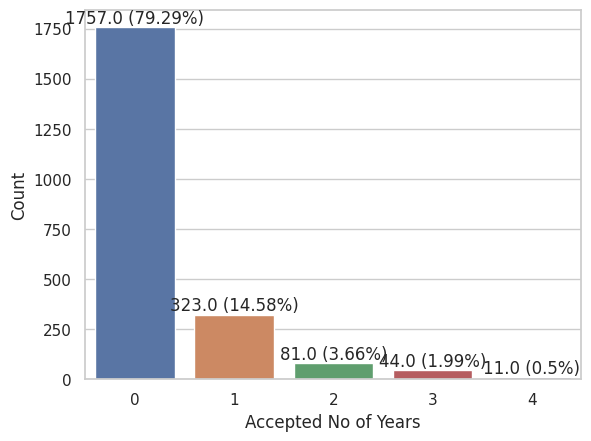

In [ ]:
sea.set(style="whitegrid")  # Set the plot style

# Create a bar plot using seaborn
sea.barplot(x='Offers_Total', y='num', data=offers)

# Add text labels with percentages
for index, row in offers.iterrows():
    plt.text(index, row['num'], f"{row['num']} ({row['percentage']}%)", va='bottom', ha='center')

# Customize labels and scales
plt.xlabel('Accepted No of Years')
plt.ylabel('Count')

# Show the plot
plt.show()


In [ ]:
cmp_df = customer_data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]

# Creating the Campaign column
Campaign = pd.DataFrame({'Campaign': ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5'] * 2240})

# Creating the No_Of_Offers column
No_Of_Offers = pd.DataFrame({'No_Of_Offers': cmp_df.values.flatten()})

# Combining Campaign and No_Of_Offers into cmp_df
cmp_df = pd.concat([Campaign, No_Of_Offers], axis=1)

# Display the first 3 rows
print(cmp_df.head(3))


     Campaign  No_Of_Offers
0  Campaign 1           0.0
1  Campaign 2           0.0
2  Campaign 3           0.0


In [ ]:
# Filter rows where No_Of_Offers is equal to 1
filtered_df = cmp_df[cmp_df['No_Of_Offers'] == 1]

# Group by Campaign and calculate the count of rows in each group
grouped_df = filtered_df.groupby('Campaign').size().reset_index(name='num')

# Calculate the percentage
grouped_df['percentage'] = (grouped_df['num'] * 100 / grouped_df['num'].sum()).round(2)

# Display the result
print(grouped_df)

     Campaign  num  percentage
0  Campaign 1  142       21.48
1  Campaign 2   30        4.54
2  Campaign 3  163       24.66
3  Campaign 4  164       24.81
4  Campaign 5  162       24.51


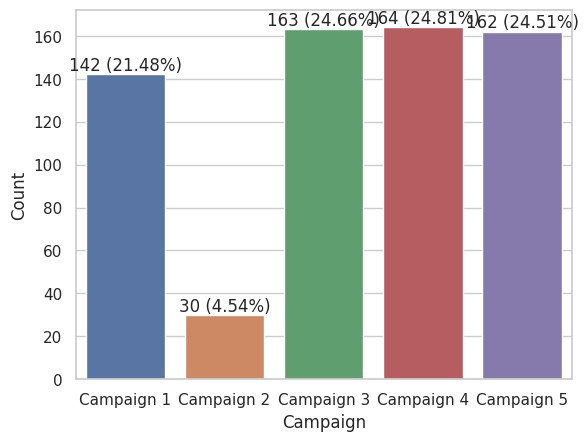

In [ ]:
sea.set(style="whitegrid")  # Set the plot style

# Create a bar plot using seaborn
sea.barplot(x='Campaign', y='num', data=grouped_df)

# Add text labels with percentages
for index, row in grouped_df.iterrows():
    plt.text(index, row['num'], f"{row['num']} ({row['percentage']}%)", va='bottom', ha='center')

# Customize labels and scales
plt.xlabel('Campaign')
plt.ylabel('Count')

# Show the plot
plt.show()

In [ ]:
result_df = customer_data.groupby('Total_Offers').agg(avg_spend=('Income', 'median')).reset_index().round(0)

print(result_df)

   Total_Offers  avg_spend
0             0    46931.0
1             1    62551.0
2             2    77870.0
3             3    83490.0
4             4    85683.0


*Observations:*

*   79.29% of Customers accepted no offers in the campaigns
*   14.58% of Customers accepted only one offer in the campaigns
*   3.66% of Customers accepted only two offer in the campaigns
*   1.99% of Customers accepted only three offer in the campaigns
*   0.50% of Customers accepted only four offer in the campaigns
*   There is no customers who accepted all the five offers in the campaigns conducted

Additionally, while a significant number of customers embraced the offers in the fourth campaign, a comparably small group accepted the offers during the second campaign. This suggests a positive correlation between the number of accepted offers and the income level of our customers.

# **Statistical Testing**

**Chi-Square Test of Independence**

A Chi-Square Test of Independence is used to determine whether or not there is a significant association between two categorical variables.In our statistical analysis, we will employ the Chi-Square Test of Independence with a significance level set at alpha = 0.05. We will calculate the p-value, and our decision rule will be as follows: If the p-value is less than 0.05, we will reject the null hypothesis (H0), indicating the presence of a statistically significant relationship between variables. Conversely, if the p-value is greater than or equal to 0.05, we will fail to reject the null hypothesis, suggesting no statistically significant relationship between the variables.

In [ ]:
single = customer_data[customer_data['Marital_Status'] == 'Single'].groupby('Education')['Total_Spent'].mean().round(2).reset_index()
single.rename(columns={'Total_Spent': 'single'}, inplace=True)

in_relationship = customer_data[customer_data['Marital_Status'] == 'In relationship'].groupby('Education')['Total_Spent'].mean().round(2).reset_index()
in_relationship.rename(columns={'Total_Spent': 'in_relationship'}, inplace=True)

joined_df = pd.merge(single, in_relationship, on='Education')
joined_df.index = ['Basic', 'Graduation', 'Master', 'PhD']
joined_df = joined_df[['single', 'in_relationship']]
print(joined_df)

            single  in_relationship
Basic        58.50            95.50
Graduation  621.40           621.85
Master      663.67           521.59
PhD         646.40           694.08


In [ ]:
# Chi-Square test of Independence
stats.chi2_contingency(joined_df)

Chi2ContingencyResult(statistic=26.796099688305084, pvalue=6.496225989239669e-06, dof=3, expected_freq=array([[ 78.1178081 ,  75.8821919 ],
       [630.64912286, 612.60087714],
       [601.23320279, 584.02679721],
       [679.96986625, 660.51013375]]))

The p-value of 6.496225989239669e-06 is significantly less than the alpha value of 0.05, providing strong evidence to reject the null hypothesis. This suggests that there is a statistically significant relationship or effect in our analysis.

In [ ]:
minDim = min(customer_data.shape)-1
#calculate Cramer's V
V = np.sqrt((26.796099688305084/2240) / minDim)
print(V)

0.019968762692188037


Cramer’s V is a measure of the strength of association between two nominal variables.
It ranges from 0 to 1 where:
0 indicates no association between the two variables.
1 indicates a strong association between the two variables.

The result we found indicates weak association between the education and marital status of customers


In [ ]:
single = customer_data[customer_data['Marital_Status'] == 'Single'].groupby('Age_Group')['Total_Spent'].mean().round(2).reset_index()
single.rename(columns={'Total_Spent': 'single'}, inplace=True)

in_relationship = customer_data[customer_data['Marital_Status'] == 'In relationship'].groupby('Age_Group')['Total_Spent'].mean().round(2).reset_index()
in_relationship.rename(columns={'Total_Spent': 'in_relationship'}, inplace=True)

joined_df1 = pd.merge(single, in_relationship, on='Age_Group')
joined_df1.index = ['Middle Aged', 'Old', 'Youth']
joined_df1 = joined_df1[['single', 'in_relationship']]
print(joined_df1)

              single  in_relationship
Middle Aged   550.73           526.36
Old           636.95           621.67
Youth        1068.36           630.00


In [ ]:
# Chi-Square test of Independence
stats.chi2_contingency(joined_df1)

Chi2ContingencyResult(statistic=58.05522051981321, pvalue=2.474395067603421e-13, dof=2, expected_freq=array([[602.35893864, 474.73106136],
       [703.87897701, 554.74102299],
       [949.80208435, 748.55791565]]))

The p-value of 2.474395067603421e-13 is significantly less than the alpha value of 0.05, providing strong evidence to reject the null hypothesis. This suggests that there is a statistically significant relationship or effect in our analysis.

In [ ]:
minDim_1 = min(customer_data.shape)-1
#calculate Cramer's V
V1 = np.sqrt((58.05522051981321/2240) / minDim_1)
print(V1)

0.029392464544863026


This indicates weak relationship between marital status and age range of customers.

**One-Way ANOVA ("analysis of variance")**



A one-way ANOVA is a statistical method used to compare the means of three or more groups to determine if there are any statistically significant differences among them. To address this, the Tukey Test is employed after ANOVA, offering insights into specific group differences. However, ANOVA results can be compromised if group variances are unequal.

In such cases, Welch's ANOVA is a robust alternative, allowing the use of the Games-Howell multiple comparisons method. Key assumptions for one-way ANOVA include normality (often valid for large samples), independence of groups, and equality of variances, which can be assessed with Levene's Test.

The analysis aims to determine if educational levels influence customer spending, where the null hypothesis suggests equal spending, and the alternative hypothesis posits differing spending patterns among customers.

In [ ]:
 from scipy.stats import f_oneway

In [ ]:
# Perform Levene's test for homogeneity of variances
stats.levene(*[customer_data[customer_data['Education'] == category]['Total_Spent'] for category in customer_data['Education'].unique()]
)

LeveneResult(statistic=23.816975577503918, pvalue=3.61478744078149e-15)

Since that the p-value 3.61478744078149e-15 is below the 5% significance level (α = .05), we reject the null hypothesis, indicating unequal variances among educational levels. This deviation from the assumption necessary for one-way ANOVA necessitates the application of Welch's ANOVA, a robust alternative that does not hinge on the equality of variances.

In [ ]:
# Perform Welch's ANOVA test
stats.f_oneway(*[customer_data[customer_data['Education'] == category]['Total_Spent'] for category in customer_data['Education'].unique()]
)

F_onewayResult(statistic=17.13530023338521, pvalue=5.3198013144921505e-11)

Since the p-value (which is 5.3198013144921505e-11) is less than the significance level(α = .05), we reject the null
hypothesis at the 5% significance level.

In [ ]:
# Perform Games-Howell post hoc test
pg.pairwise_gameshowell(data=customer_data, dv='Total_Spent', between='Education')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Basic,Graduation,81.796296,621.686380,-539.890084,24.575349,-21.968766,230.069450,0.000000e+00,-0.919208
1,Basic,Master,81.796296,569.116814,-487.320518,30.221513,-16.124954,379.093002,7.949197e-14,-0.850146
2,Basic,PhD,81.796296,676.733888,-594.937591,32.768989,-18.155506,411.693335,1.354472e-13,-1.011694
3,Graduation,Master,621.686380,569.116814,52.569566,30.901161,1.701217,1137.011208,3.234635e-01,0.087678
4,Graduation,PhD,621.686380,676.733888,-55.047508,33.396835,-1.648285,887.170259,3.520799e-01,-0.090883
5,Master,PhD,569.116814,676.733888,-107.617074,37.745737,-2.851105,1006.239724,2.301587e-02,-0.177218


It is evident that there is a statistically significant diffrence between the amount spend
by the customers with primary and university education.

*Are there any differences between the amount spent when
considering marital status of customers?*


**Overview of Two Sample t test**

In [ ]:
# Perform Levene's test for homogeneity of variances
stats.levene(*[customer_data[customer_data['Marital_Status'] == category]['Total_Spent'] for category in customer_data['Marital_Status'].unique()]
)

LeveneResult(statistic=1.2401006505756371, pvalue=0.2655725389987043)

Since the p-value = 0.2655 is greater than the significance level(α = .05), we fail to reject the null hypothesis at
the 5% significance level. That is, variances are equal across the marital status of customers. Thus, by
satisfying all the conditions, we can use 2 sample t test.

In [ ]:
group1 = customer_data.query('Marital_Status == "Single"')['Total_Spent']
group2 = customer_data.query('Marital_Status == "In relationship"')['Total_Spent']

stats.ttest_ind(group1, group2, equal_var=True)


TtestResult(statistic=0.9105294276481157, pvalue=0.362642487119173, df=2214.0)

Since the p-value = 0.3626 is greater than the significance level(α = .05), we fail to reject the null hypothesis at
the 5% significance level.

There is not sufficient evidence to support the claim that amount spend by customers
varies with respect to their marital status.
Thus, Marital Status, on its own, does not consititute a diffrence in the amount spend by customers.



*Are there any differences between the amount spent when
considering age group of customers?*

In [ ]:
# Perform Levene's test for homogeneity of variances
stats.levene(*[customer_data[customer_data['Age_Group'] == category]['Total_Spent'] for category in customer_data['Age_Group'].unique()]
)

LeveneResult(statistic=0.29185117683972267, pvalue=0.7469084231697174)

Since the p-value = 0.7469 is greater than the significance level(α = .05), we fail to reject the null hypothesis at
the 5% significance level. That is, variances are equal across the age group of customers. Thus, by
satisfying all the conditions, we can use one way ANOVA.

In [ ]:
# Perform a one-way ANOVA
model = stats.f_oneway(*[group['Total_Spent'] for name, group in customer_data.groupby('Age_Group')])
print(model)

F_onewayResult(statistic=7.238927809043755, pvalue=0.0007352122110178494)


Since the p-value = 0.000735 is less than the significance level(α = .05), we reject the null hypothesis at the
5% significance level.


There is sufficient evidence to support the claim that amount spend by customers
varies with respect to their age group.
Thus, Age, on its own, contitute a diffrence in the amount spend by customers


In [ ]:
pg.pairwise_tukey(data=customer_data,dv='Total_Spent', between='Age_Group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Middle Aged,Old,534.772983,627.082134,-92.309151,29.913979,-3.085820,0.005825,-0.153506
1,Middle Aged,Youth,534.772983,951.466667,-416.693684,157.400765,-2.647342,0.022249,-0.658550
2,Old,Youth,627.082134,951.466667,-324.384532,155.928033,-2.080348,0.094142,-0.548623


It is evident that there is a statistically significant diffrence between the amount spend
by the middle aged (between 30 and 45) customers than the other age group of
customers

*Are there any differences between the amount spent when
considering the products we sell?*

In [ ]:
products_df['Customer_Id'] = list(range(1, 2240 + 1)) * 6

products_df['Product_Name'] = pd.Categorical(products_df['Product_Name'])

# Print the first few rows of the DataFrame to check the changes
print(products_df.head())


  Product_Name  Total_Spent  Customer_Id
0         Wine        635.0            1
1        Fruit         88.0            2
2         Meat        546.0            3
3         Fish        172.0            4
4        Sweet         88.0            5


**Overview of Friedman Test**

The Friedman Test serves as a non-parametric alternative to Repeated Measures ANOVA, assessing if there's a significant difference among means in three or more groups with the same subjects. Post-hoc testing involves pairwise Wilcoxon rank sum tests with a Bonferroni correction to address multiple comparisons. Assumptions include the continuity of the variable, random sampling, and sufficient data, emphasizing the need for a continuous variable, simple random samples, and an adequate sample size relative to expected differences across groups. The Bonferroni correction is employed to mitigate the increased risk of Type I errors associated with multiple statistical tests.

In [ ]:
from scipy.stats import friedmanchisquare

result = friedmanchisquare(*[group['Total_Spent'].values for name, group in products_df.groupby('Product_Name')])
result

FriedmanchisquareResult(statistic=nan, pvalue=nan)

Since the p-value is less than the significance level(α = .05), we reject the null hypothesis at the 5%
significance level. we can reject the null hypothesis that the average amount spend by customers is the same
for all products.

In [ ]:
# Perform pairwise Wilcoxon test with Bonferroni correction
result = pg.pairwise_ttests(dv='Total_Spent', between='Product_Name', padjust='bonferroni', data=products_df)

# Display the result
print(result)


        Contrast      A      B  Paired  Parametric          T     dof  \
0   Product_Name   Wine  Fruit   False        True  38.629926  4430.0   
1   Product_Name   Wine   Meat   False        True  16.047957  4430.0   
2   Product_Name   Wine   Fish   False        True  36.841302  4430.0   
3   Product_Name   Wine  Sweet   False        True  38.519428  4430.0   
4   Product_Name   Wine   Gold   False        True  36.017975  4430.0   
5   Product_Name  Fruit   Meat   False        True -29.064713  4430.0   
6   Product_Name  Fruit   Fish   False        True  -7.846185  4430.0   
7   Product_Name  Fruit  Sweet   False        True  -0.553844  4430.0   
8   Product_Name  Fruit   Gold   False        True -12.687979  4430.0   
9   Product_Name   Meat   Fish   False        True  26.376212  4430.0   
10  Product_Name   Meat  Sweet   False        True  28.896898  4430.0   
11  Product_Name   Meat   Gold   False        True  25.159979  4430.0   
12  Product_Name   Fish  Sweet   False        True 

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)




*   The comparison between 'Wine' and 'Fruit' as well as 'Fruit' and 'Meat' indicates significant distinctions, supported by very low adjusted p-values.
*   'Fruit' vs. 'Sweet' and 'Fish' vs. 'Gold', show no significant differences after Bonferroni correction, as their adjusted p-values exceed the 0.05 threshold.
*   'Wine' and 'Meat' emerge as top products with statistically significant differences.
*   There is no statistically significant diffrence between the amount spend on the products: Fruits and Sweets.

# **Insights**


*   We must enhance the effectiveness of our campaigns as approximately 79.29% of our customers currently do not accept our offers. Notably, the acceptance of offers demonstrates a positive correlation with customers' income levels. Additionally, 58% of our customer base falls within the annual income range of 40k to 80k dollars. Therefore, optimizing campaigns to feature offers appealing to customers earning below 60k dollars annually is likely to elevate the acceptance rate.
*   Income and the amount spend of customers have a moderate correlation positively.  Similarly, there is a moderate positive correlation between the income level and the total no of purchases made by our customers.
*   Customers with University education spend more than the customers with basic education.
*   Marital Status, on its own, does not constitute any difference in the amount spend by our customers
*   Customer who aged between 17 and 30 spend more than the other age range.
*   The products that most likely customers buy are Wine and Meat. Customers spend equally on
fruits and sweets
*   52% of total amount spend by customers who have enrolled in 2013.
*   38.98% customers prefer to purchase in Stores and 27.45% of customer prefer online purchasing.
*  In last 2 years, 95% of customers visits the website less than 9 times.




